<a href="https://colab.research.google.com/github/aswa02/Task-7/blob/main/Task_7_SVM_Assignment14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [20]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')

In [3]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
data.drop('User ID', axis = 1, inplace = True)

In [7]:
# Handling categorical feature Gender using One Hot Encoder

In [8]:
ohe = OneHotEncoder(sparse = False)
data_gender = ohe.fit_transform(data[['Gender']])
data_gender = pd.DataFrame(data_gender)

In [9]:
del data['Gender']
data.reset_index(drop = True, inplace = True)
data_gender.reset_index(drop = True, inplace = True)
data = pd.concat([data, data_gender], axis = 1)

In [10]:
data

,Age,EstimatedSalary,Purchased,0,1
0,19,19000,0,0.0,1.0
1,35,20000,0,0.0,1.0
2,26,43000,0,1.0,0.0
3,27,57000,0,1.0,0.0
4,19,76000,0,0.0,1.0
...,...,...,...,...,...
395,46,41000,1,1.0,0.0
396,51,23000,1,0.0,1.0
397,50,20000,1,1.0,0.0
398,36,33000,0,0.0,1.0


**Splitting the dataset into the Training set and Test set**

In [11]:
X = data.drop('Purchased', axis = 1)
y = data['Purchased']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Feature Scaling**

In [13]:
ss = StandardScaler()

In [14]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


**Fitting SVM to the Training set**

In [15]:
svc = SVC()

In [16]:
svc.fit(X_train, y_train)

SVC()

In [17]:
print(svc.score(X_train, y_train))

0.896875


**Predicting the Test set results**

In [18]:
print(svc.score(X_test, y_test))

0.95


**Making the Confusion Matrix**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


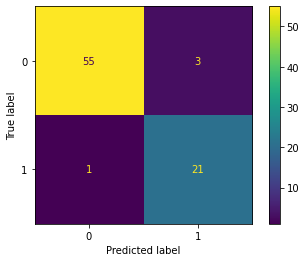

In [19]:
plot_confusion_matrix(svc, X_test, y_test)

**Visualising the Training set results**

Text(42.0, 0.5, 'Truth')

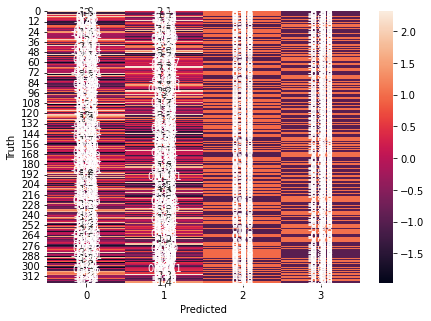

In [23]:
plt.figure(figsize=(7,5))
sns.heatmap(X_train, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Visualising the Test set results**

Text(42.0, 0.5, 'Truth')

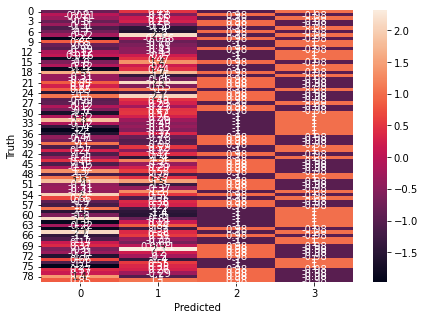

In [25]:
plt.figure(figsize=(7,5))
sns.heatmap(X_test, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')